# Note

* All airline, all price
* 2023-07-13 : initial: all airlines, remove outlier, LR, simplify isotonic
* 2023-07-30 : remove 30 days fitting, update simplify isotonic
* 2023-08-11 : update get_slope, get_intercept, get_linear_equation, equations
* 2023-08-12 : add y_hat for LR

# Setup

In [1]:
import os
import pandas as pd
from datetime import datetime, date
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

# get_slope

In [2]:
def get_slope(x1, y1, x2, y2):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b1 = ((y1-mean_y)*(x1-mean_x) + (y2-mean_y)*(x2-mean_x))/(math.pow(x1-mean_x,2) + math.pow(x2-mean_x,2))
    return b1

In [3]:
get_slope(2, 3, 6, 7)

1.0

# get_intercept

In [4]:
def get_intercept(x1, y1, x2, y2, b1):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b0 = mean_y - b1*mean_x
    return b0

In [5]:
get_intercept(2, 3, 6, 7, get_slope(2, 3, 6, 7))

1.0

# get_linear_equation

In [6]:
# b0 : intercept
# b1 : slope
# y = b0 + b1*x
def get_linear_equation(b0,b1):
    if b1 != 0 :
        if b1 > 0:
            print('y = %.2f' % b0, '+ %.2f' % b1, '*x' )
        else:
            print('y = %.2f' % b0, ' %.2f' % b1, '*x' )
    else : 
        print('y = %.2f' % b0 )

In [7]:
get_linear_equation(2.3333,4.567)

y = 2.33 + 4.57 *x


# 60 days prior

## Read CSV

In [8]:
folder = 'C:\\Users\\Pleng Weerada\\Documents\\MSc Project\\flight_data_60days\\data_files_for_model\\'

In [9]:
# ref : https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58
file_name = folder + 'ticket_price_ICN_direct__2023-07-12_16-13-42.csv'
df = pd.read_csv(file_name)

In [10]:
df

route       airline_nm  direct depart_dt col_pre_depart_dt  \
0    LON-to-ICN  Asiana Airlines  direct      24/5        2023-05-24   
1    LON-to-ICN       Korean Air  direct      24/5        2023-05-24   
2    LON-to-ICN  Asiana Airlines  direct      24/5        2023-05-24   
3    LON-to-ICN       Korean Air  direct      24/5        2023-05-24   
4    LON-to-ICN  Asiana Airlines  direct      24/5        2023-05-24   
..          ...              ...     ...       ...               ...   
867  LON-to-ICN       Korean Air  direct      30/5        2023-05-30   
868  LON-to-ICN  Virgin Atlantic  direct      30/5        2023-05-30   
869  LON-to-ICN  Asiana Airlines  direct      30/5        2023-05-30   
870  LON-to-ICN       Korean Air  direct      30/5        2023-05-30   
871  LON-to-ICN  Virgin Atlantic  direct      30/5        2023-05-30   

      search_dt  col_days_bf_depart  ticket_price  price_on_depart_date  \
0    2023-03-25                 -60         686.0                 689.0   
1    2023-03-25                 -60         658.0                 713.0   
2    2023-03-26                 -59         712.0                 689.0   
3    2023-03-26                 -59         658.0                 713.0   
4    2023-03-27                 -58         710.0                 689.0   
..          ...                 ...           ...                   ...   
867  2023-05-28                  -2         795.0                 711.0   
868  2023-05-28                  -2         847.0                 765.0   
869  2023-05-29                  -1         685.0                 689.0   
870  2023-05-29                  -1         795.0                 711.0   
871  2023-05-29                  -1         854.0                 765.0   

     col_saving_rate col_day_of_week  
0           0.435414       Wednesday  
1           7.713885       Wednesday  
2          -3.338171       Wednesday  
3           7.713885       Wednesday  
4          -3.047896       Wednesday  
..               ...             ...  
867       -11.814346         Tuesday  
868       -10.718954         Tuesday  
869         0.580552         Tuesday  
870       -11.814346         Tuesday  
871       -11.633987         Tuesday  

[872 rows x 11 columns]

## plot graph

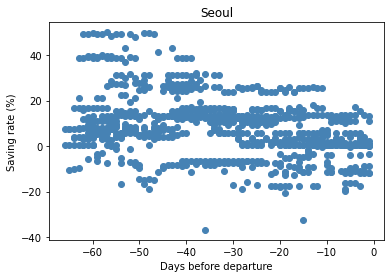

In [11]:
plt.scatter(df['col_days_bf_depart'], df['col_saving_rate'], color = 'steelblue')
plt.title("Seoul")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

## Remove outlier

In [12]:
# taken from : https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
import pandas as pd

''' Detection '''
# IQR
# Calculate the upper and lower limits
median = df['col_saving_rate'].quantile(0.5)
Q1 = df['col_saving_rate'].quantile(0.25)
Q3 = df['col_saving_rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print('median %.4f' % median)
print('Q1 {0:.4f},Q3 {1:.4f}, IQR {2:.4f}, upper {3:.4f},lower {4:.4f}'.format(Q1, Q3, IQR, upper, lower))
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['col_saving_rate']>=upper)[0]
lower_array = np.where(df['col_saving_rate']<=lower)[0]
 
# # Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# # Print the new shape of the DataFrame
print("New Shape: ", df.shape)

median 7.5949
Q1 0.5806,Q3 14.4650, IQR 13.8844, upper 35.2917,lower -20.2461
New Shape:  (829, 11)


## plot graph (af remove outlier)

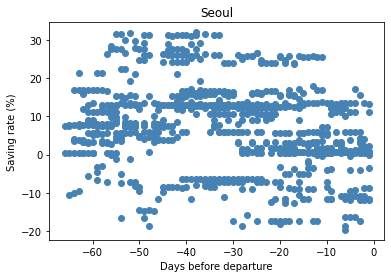

In [13]:
plt.scatter(df['col_days_bf_depart'], df['col_saving_rate'], color = 'steelblue')
plt.title("Seoul")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

## 1) LR

In [14]:
import numpy as np

x = []
y = []
for index, row in df.iterrows():
    x.append([row['col_days_bf_depart']])
    y.append([row['col_saving_rate']])
    
len(x), len(y)

(829, 829)

Linear regression------------------------------
Coefficients: [[-0.15999534]] 
Intercept: [2.04865609]
y_hat = 2.05  -0.16 x
Mean squared error: 110.21
Mean absolute error: 8.25
Coefficient of determination: 0.07


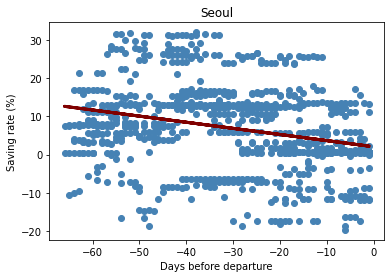

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
lnr_clf = linear_model.LinearRegression()

# Train the model using the training sets
lnr_clf.fit(x, y)

# predit saving rate using train data
lnr_y_pred = lnr_clf.predict(x)

print("Linear regression" + "-"*30)
print("Coefficients: {0} \nIntercept: {1}".format(lnr_clf.coef_, lnr_clf.intercept_))
print("y_hat = %.2f" % lnr_clf.intercept_[0] , ' %.2f' % lnr_clf.coef_[0][0], 'x' )

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, lnr_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, lnr_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, lnr_y_pred))

# Plot outputs
plt.scatter(x, y, color = 'steelblue')
plt.plot(x, lnr_y_pred, color = 'maroon', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Seoul")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

## 2) Isotonic

In [16]:
df

route       airline_nm  direct depart_dt col_pre_depart_dt  \
0    LON-to-ICN  Asiana Airlines  direct      24/5        2023-05-24   
1    LON-to-ICN       Korean Air  direct      24/5        2023-05-24   
2    LON-to-ICN  Asiana Airlines  direct      24/5        2023-05-24   
3    LON-to-ICN       Korean Air  direct      24/5        2023-05-24   
4    LON-to-ICN  Asiana Airlines  direct      24/5        2023-05-24   
..          ...              ...     ...       ...               ...   
867  LON-to-ICN       Korean Air  direct      30/5        2023-05-30   
868  LON-to-ICN  Virgin Atlantic  direct      30/5        2023-05-30   
869  LON-to-ICN  Asiana Airlines  direct      30/5        2023-05-30   
870  LON-to-ICN       Korean Air  direct      30/5        2023-05-30   
871  LON-to-ICN  Virgin Atlantic  direct      30/5        2023-05-30   

      search_dt  col_days_bf_depart  ticket_price  price_on_depart_date  \
0    2023-03-25                 -60         686.0                 689.0   
1    2023-03-25                 -60         658.0                 713.0   
2    2023-03-26                 -59         712.0                 689.0   
3    2023-03-26                 -59         658.0                 713.0   
4    2023-03-27                 -58         710.0                 689.0   
..          ...                 ...           ...                   ...   
867  2023-05-28                  -2         795.0                 711.0   
868  2023-05-28                  -2         847.0                 765.0   
869  2023-05-29                  -1         685.0                 689.0   
870  2023-05-29                  -1         795.0                 711.0   
871  2023-05-29                  -1         854.0                 765.0   

     col_saving_rate col_day_of_week  
0           0.435414       Wednesday  
1           7.713885       Wednesday  
2          -3.338171       Wednesday  
3           7.713885       Wednesday  
4          -3.047896       Wednesday  
..               ...             ...  
867       -11.814346         Tuesday  
868       -10.718954         Tuesday  
869         0.580552         Tuesday  
870       -11.814346         Tuesday  
871       -11.633987         Tuesday  

[829 rows x 11 columns]

In [17]:
x = df['col_days_bf_depart'].to_numpy()
y = df['col_saving_rate'].to_numpy()

type(x), x.shape, type(y), y.shape

(numpy.ndarray, (829,), numpy.ndarray, (829,))

Iso ------------------------------
param: 
{'increasing': 'auto', 'out_of_bounds': 'nan', 'y_max': None, 'y_min': None}
Mean squared error: 104.18
Mean absolute error: 7.83
Coefficient of determination: 0.13


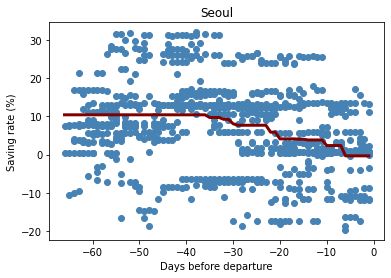

In [18]:
from sklearn.isotonic import IsotonicRegression

# classifier creation
iso_clf = IsotonicRegression(increasing = 'auto')

# train model & predict
iso_y_pred = iso_clf.fit_transform(x, y)

print("Iso " + "-"*30)
print("param: \n{0}".format(iso_clf.get_params()))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
plt.scatter(x, y, color = 'steelblue')
# plt.plot(x, iso_y_pred, color = 'maroon', linewidth=3)
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Seoul")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

In [19]:
iso_clf.X_thresholds_, len(iso_clf.X_thresholds_)

(array([-66., -36., -35., -33., -32., -31., -30., -29., -23., -22., -21.,
        -20., -17., -16., -15., -14., -11., -10.,  -7.,  -6.,  -1.]),
 21)

In [20]:
iso_clf.y_thresholds_

array([10.39404259, 10.39404259,  9.69284707,  9.69284707,  9.21534556,
        9.21534556,  8.05170169,  7.66621501,  7.66621501,  5.8552759 ,
        5.8552759 ,  4.10197963,  4.10197963,  4.00935837,  4.00935837,
        3.81945036,  3.81945036,  2.35411112,  2.35411112, -0.3361019 ,
       -0.3361019 ])

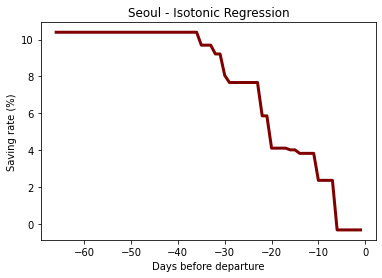

In [21]:
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Seoul - Isotonic Regression")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

### Simplify

Simplified Isotonic Regression


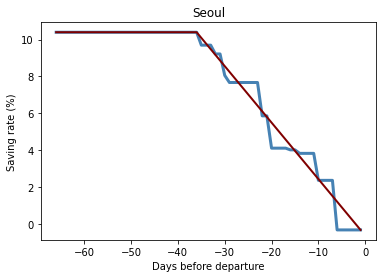

In [22]:
x_sim = [-66 ,-36 ,-1]
y_sim = [10.39404259 ,10.39404259 ,-0.3361019]

print("Simplified Isotonic Regression")
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color="steelblue", linewidth=3, label="Isotonic")
plt.plot(x_sim, y_sim, color="maroon", linewidth=2, label="Isotonic Simplify")

plt.title("Seoul")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

### Equation

In [23]:
x_sim, y_sim

([-66, -36, -1], [10.39404259, 10.39404259, -0.3361019])

In [24]:
for i in range(0, len(x_sim)-1):
    print("-"*30, "\n", "{0}: x in [{1},{2}]".format(i+1, x_sim[i], x_sim[i+1]))
    # m = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    b1 = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    print('slope ', b1)

    b0 = get_intercept(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print('intercept ', b0)

    get_linear_equation(b0,b1)

------------------------------ 
 1: x in [-66,-36]
slope  0.0
-66 10.39404259 -36 10.39404259 0.0
intercept  10.39404259
y = 10.39
------------------------------ 
 2: x in [-36,-1]
slope  -0.3065755568571429
-36 10.39404259 -1 -0.3361019 -0.3065755568571429
intercept  -0.6426774568571432
y = -0.64  -0.31 *x


### MSE

In [25]:
def predict_ICN(x):
    y = 0
    if x >= -66 and x < -36:
        y =  10.39
    else:
        y =  -0.64  -0.31 *x
    return y

Iso (simpliflied)------------------------------
Mean squared error: 104.94
Mean absolute error: 7.82
Coefficient of determination: 0.12


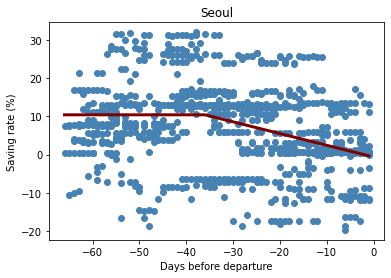

In [26]:
# predict using simpliflied isotonic
iso_y_pred = []
for i in x:
    iso_y_pred.append(predict_ICN(i))

print("Iso (simpliflied)" + "-"*30)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
plt.scatter(x, y, color="steelblue")
plt.plot(x_sim, y_sim, color="maroon", linewidth=3)

plt.title("Seoul")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

### Result

* price increase after day -36